In [1]:
import os
import io
import pandas as pd
import numpy as np
import subprocess
import matplotlib.pyplot as plt

In [2]:
region = str(input("enter the region you want to figure:"))
wd = '/mnt/Genoma/drobles/ccastaneda/gwas-reseq/lcr_filtered/regions/'+region
os.chdir(wd)

enter the region you want to figure:CDH1


In [3]:
r1 = pd.read_csv('r1')
r2 = pd.read_csv('r2')

In [4]:
c1 = r1[(r1.Protein_position.astype(str) != 'nan' )]
r1 = r1.drop_duplicates('Existing_variation')

In [5]:
empty_r2test = r2.empty
empty_c1test = c1.empty

In [6]:
if empty_r2test == True:
    print('r2_is_empty')
    if empty_c1test == True:
        print('c1 is empty')
        c = r1
        s = r1
    elif empty_c1test == False:
        c = c1.merge(r1, right_index = True, left_index = True, how = 'outer')
elif empty_r2test == False:
    c2 = r2[(r2.Protein_position.astype(str) != 'nan' )]
    r2 = r2.drop_duplicates('Existing_variation')
    s = r1.merge(r2, how = 'outer')
    c = c1.merge(c2, how = 'outer')
    c['Position'] = c.GRCh38.str.split('-').str.get(0)
    c = c.set_index('Position')
    c = c.drop_duplicates('Existing_variation')
    c['Protein_position'] =c.Protein_position.apply(lambda x: int(x)) 
    

r2_is_empty
c1 is empty


In [7]:
c

,Signal,Region,Existing_variation,GRCh38,ref_alt,-logP_fisher,Consequence,Protein_position,Amino_acids,Feature,CANONICAL,OR_fisher,OR_cond1,P_fisher,P_cond1
0,s1,CDH1,rs181642569,chr16:68770202-68770202,C_T,3.146059,intron_variant,NaN,NaN,ENST00000621016,NaN,0.1723,1.0,0.000714,1.0


In [8]:
fisher = pd.read_csv(region +'_fisher.csv').set_index('SNP')
col_list = ["SNP", "Protein_position", 'Amino_acids', 'Existing_variation', 'Allele']
vep = pd.read_csv(region +'_vep.csv', usecols=col_list, low_memory = False).set_index('SNP')
vep_coding = vep.dropna(axis = 0)
vep = vep.drop_duplicates('Existing_variation')
vep['Allele'] = vep.Allele.str.split('=').str.get(1)

In [9]:
vep

,Allele,Protein_position,Amino_acids,Existing_variation
SNP,,,,
chr16:68538749,G,NaN,NaN,rs529122258
chr16:68538758,T,NaN,NaN,rs891155727
chr16:68538967,-,NaN,NaN,rs765973094
chr16:68539112,C,NaN,NaN,rs974327573
chr16:68539158,G,NaN,NaN,rs200320282
...,...,...,...,...
chr16:68902190,T,NaN,NaN,rs745470719
chr16:68902521,A,NaN,NaN,rs761094032
chr16:68902573,G,NaN,NaN,rs766714645


In [10]:
g = pd.DataFrame()
g['Position'] = s.GRCh38.str.split('-').str.get(0)
g['Base change'] = s.ref_alt.apply(lambda x: str(x).replace('_', '/'))
g = g.fillna(np.NaN)
g = g.set_index('Position')
g['AF in cases'] = fisher['F_A']
g['AF in controls'] = fisher['F_U']
g['P value'] = fisher['P']
g['OR'] = fisher['OR']
g = g.sort_values('P value')
g['Existing_variation'] = vep['Existing_variation']
g['Allele'] = vep['Allele']
if empty_c1test == True:
    g['Consequence'] = np.NaN
else:
    g['Consequence'] = c.Amino_acids.str.split('/').str.get(0) + c.Protein_position.astype(str) + c.Amino_acids.str.split('/').str.get(1)

In [11]:
vep

,Allele,Protein_position,Amino_acids,Existing_variation
SNP,,,,
chr16:68538749,G,NaN,NaN,rs529122258
chr16:68538758,T,NaN,NaN,rs891155727
chr16:68538967,-,NaN,NaN,rs765973094
chr16:68539112,C,NaN,NaN,rs974327573
chr16:68539158,G,NaN,NaN,rs200320282
...,...,...,...,...
chr16:68902190,T,NaN,NaN,rs745470719
chr16:68902521,A,NaN,NaN,rs761094032
chr16:68902573,G,NaN,NaN,rs766714645


In [12]:
to_condition = pd.read_csv('to_condition', header = None).rename(columns = {0:'Position'}).set_index('Position')

In [13]:
to_condition

""
Position
chr16:68770202
chr16:68696612


In [14]:
to_condition['Base change'] = fisher.A1 +'/'+ fisher.A2
to_condition['AF in cases'] = fisher.F_A
to_condition['AF in controls'] = fisher.F_U
to_condition['P value'] = fisher.P
to_condition['OR'] = fisher.OR

In [15]:
to_condition

,Base change,AF in cases,AF in controls,P value,OR
Position,,,,,
chr16:68770202,C/T,0.001265,0.007294,0.000714,0.1723
chr16:68696612,A/G,0.024790,0.037800,0.013520,0.6470


In [16]:
vep['Consequence'] = vep.Amino_acids.str.split('/').str.get(0) + vep.Protein_position.astype(str) + vep.Amino_acids.str.split('/').str.get(1)
vep = vep.reset_index().rename(columns = {'SNP': 'Position'}).set_index('Position').drop\
(axis = 1, columns = {'Protein_position', 'Amino_acids'})

In [17]:
vep = vep.drop_duplicates('Existing_variation') 

In [18]:
vep

,Allele,Existing_variation,Consequence
Position,,,
chr16:68538749,G,rs529122258,NaN
chr16:68538758,T,rs891155727,NaN
chr16:68538967,-,rs765973094,NaN
chr16:68539112,C,rs974327573,NaN
chr16:68539158,G,rs200320282,NaN
...,...,...,...
chr16:68902190,T,rs745470719,NaN
chr16:68902521,A,rs761094032,NaN
chr16:68902573,G,rs766714645,NaN


In [19]:
to_condition = to_condition.merge(vep, right_index = True, left_index = True)

In [20]:
to_condition

,Base change,AF in cases,AF in controls,P value,OR,Allele,Existing_variation,Consequence
Position,,,,,,,,
chr16:68770202,C/T,0.001265,0.007294,0.000714,0.1723,C,rs181642569,NaN
chr16:68696612,A/G,0.024790,0.037800,0.013520,0.6470,A,rs35789195,NaN


In [21]:
s['Position'] = s.GRCh38.str.split('-').str.get(0)
s = s.set_index('Position')
g['P value 1st'] = s.P_cond1
if empty_r2test == False:
    g['P value 2nd'] = s.P_cond2
else:
    g['P value 2nd'] = np.NaN

In [22]:
g

,Base change,AF in cases,AF in controls,P value,OR,Existing_variation,Allele,Consequence,P value 1st,P value 2nd
Position,,,,,,,,,,
chr16:68770202,C/T,0.001265,0.007294,0.000714,0.1723,rs181642569,C,NaN,1.0,NaN


In [23]:
g['Region'] = s.Signal.str.replace('s', 'r')

add1 = pd.read_csv('./plink/1ADD.csv', header = None, names = [0, 'chr', 'Position', 'BP', 'A', 'test',\
                                                               'N', 'OR', 'STAT', 'P'])

add1 = add1.set_index('Position')

add2 = pd.read_csv('./plink/2ADD.csv', header = None, names = [0, 'chr', 'Position', 'BP', 'A', 'test',\
                                                               'N', 'OR', 'STAT', 'P'])

add2 = add2.set_index('Position')

to_condition['P value 1st'] = add1.P
to_condition['P value 2nd'] = add2.P

to_condition['Region'] = (range(1, 1 + len(to_condition)))
to_condition['Region'] = 'r' + to_condition.Region.astype(str) + ' lead'

to_condition

frames = [g, to_condition]
result = pd.concat(frames)

result = result.sort_values('P value').loc[~result.index.duplicated(keep='last')]

result.to_csv('table_for_paper.csv')

In [24]:
result

,Base change,AF in cases,AF in controls,P value,OR,Existing_variation,Allele,Consequence,P value 1st,P value 2nd,Region
Position,,,,,,,,,,,
chr16:68770202,C/T,0.001265,0.007294,0.000714,0.1723,rs181642569,C,NaN,NaN,NaN,r1 lead
chr16:68696612,A/G,0.024790,0.037800,0.013520,0.6470,rs35789195,A,NaN,0.007683,NaN,r2 lead


In [25]:
carriers = pd.read_csv('/mnt/Genoma/drobles/ccastaneda/gwas-reseq/all_carriers', delimiter = '\t')

In [26]:
carriers = carriers.set_index('SNP')

In [27]:
non_carriers = pd.read_csv('/mnt/Genoma/drobles/ccastaneda/gwas-reseq/all_non_carriers', delimiter = '\t')

In [28]:
non_carriers = non_carriers.set_index('SNP')

In [29]:
carriers = carriers.merge(non_carriers, right_index = True, left_index = True).reset_index()
carriers['POS'] = carriers.SNP.str.split(':').str.get(0) + ':' + carriers.SNP.str.split(':').str.get(1)

In [30]:
carriers = carriers.set_index('POS')

In [31]:
table_for_Dave = carriers.merge(result, right_index = True, left_index = True)

In [32]:
table_for_Dave['ref'] = table_for_Dave.SNP.str.split(':').str.get(-2)
table_for_Dave['alt'] = table_for_Dave.SNP.str.split(':').str.get(-1)

In [33]:
table_for_Dave = table_for_Dave.drop(axis = 1, labels = 'Base change')

In [34]:
table_for_Dave.to_csv('table_for_Dave.tsv', sep = '\t')

In [35]:
add1['-logP'] = -(np.log10(add1.P))
add2['-logP'] = -(np.log10(add2.P))

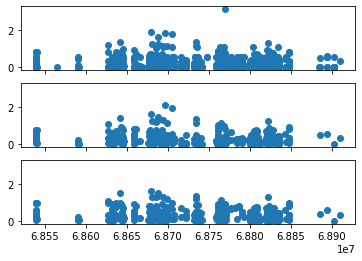

<Figure size 432x288 with 0 Axes>

In [36]:
fig, ax = plt.subplots(3,1, sharey=True, sharex=True)

ax[0].scatter(fisher['BP'], fisher['-logP'])
ax[1].scatter(add1['BP'], add1['-logP'])
ax[2].scatter(add2['BP'], add2['-logP'])
plt.show()
plt.savefig('regresions.tiff')